# Metadata

```{yaml}
Course:   DS 5100
Module:   04 Python Functions
Topic:    Variable Scope
Author:   R.C. Alvarado
Date:     02 September 2022
```

# Overview

A variable's **scope** is the part of a program where it is **visible**.

* Scope refers to the **coding region**, such as a function block, from which a particular Python object is accessible.
* Visible means available or **usable** to the code block in question.
* If a variable is **in scope** to a function, it is visible the function.
* If it is **out of scope** to a function, it is not visible the function.

When a variable is defined **inside** of a function, is is not visible outside of the function.
* We say such variables are **local** to the function.
* They are also removed from memory when the function completes.

When a variable is defined **outside** of any function in a script, it is visible to any function inside of the script
* We say such variables are **global** to the functions in the file or context in which the variables are defined.
* A function can replace a global variable with local variable by defining that variable. In this case, a variable can have global and local versions in the same program.

Sometimes variable scope is called **lexical** scope.

It is helpful to have a good understanding of scope to avoid surprises and confusion.  

The concept is easier than it may look in the abstract. Let's look at some examples where we vary the use of local and global definitions of `x`.

# Lutz on Scoping

Here's an excerpt from [Lutz, Chapter 17](https://learning.oreilly.com/library/view/learning-python-5th/9781449355722/ch17.html#scope_details). Please read the whole thing.

**The enclosing module is a global scope.** Each module is a global scope—that is, a namespace in which variables created (assigned) at the top level of the module file live. Global variables become attributes of a module object to the outside world after imports but can also be used as simple variables within the module file itself.

**The global scope spans a single file only.** Don’t be fooled by the word “global” here—names at the top level of a file are global to code within that single file only. There is really no notion of a single, all-encompassing global file-based scope in Python. Instead, names are partitioned into modules, and you must always import a module explicitly if you want to be able to use the names its file defines. **When you hear “global” in Python, think “module.”**

**Assigned names are local unless declared global or nonlocal.** By default, all the names assigned inside a function definition are put in the local scope (the namespace associated with the function call). If you need to assign a name that lives at the top level of the module enclosing the function, you can do so by declaring it in a global statement inside the function. If you need to assign a name that lives in an enclosing def, as of Python 3.X you can do so by declaring it in a nonlocal statement.

**All other names are enclosing function locals, globals, or built-ins.** Names not assigned a value in the function definition are assumed to be enclosing scope locals, defined in a physically surrounding def statement; globals that live in the enclosing module’s namespace; or built-ins in the predefined built-ins module Python provides.

**Each call to a function creates a new local scope.** Every time you call a function, you create a new local scope—that is, a namespace in which the names created inside that function will usually live. You can think of each def statement (and lambda expression) as defining a new local scope, but the local scope actually corresponds to a function call. Because Python allows functions to call themselves to loop—an advanced technique known as recursion and noted briefly in Chapter 9 when we explored comparisons—each active call receives its own copy of the function’s local variables. Recursion is useful in functions we write as well, to process structures whose shapes can’t be predicted ahead of time; we’ll explore it more fully in Chapter 19.

And here is a nice visualization of scopes:

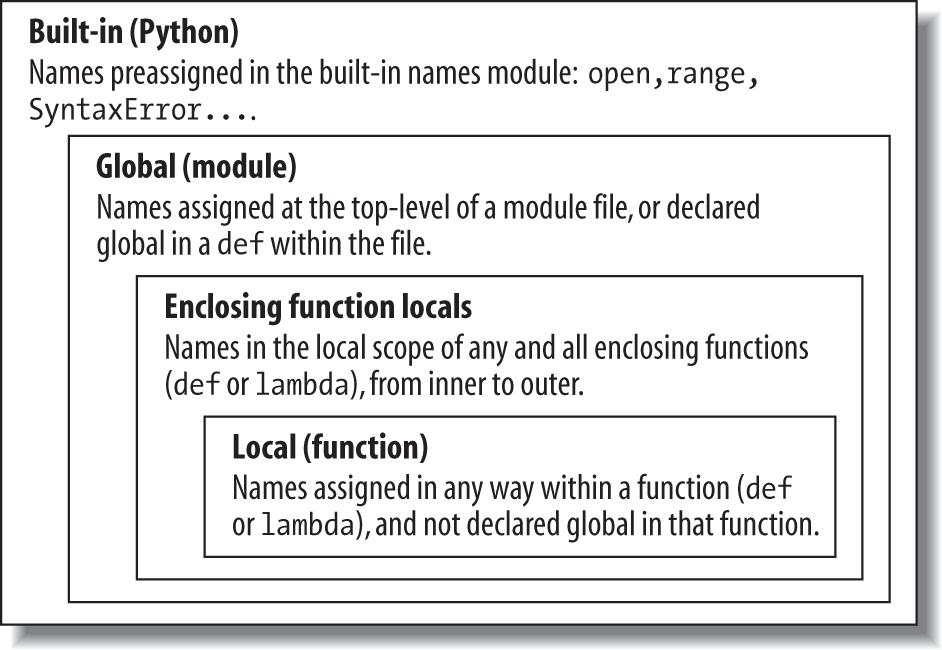

Please read [Lutz, Chapter 17](https://learning.oreilly.com/library/view/learning-python-5th/9781449355722/ch17.html#scope_details) for a good overview of scoping.

# The Tinted Glass Metaphor

<img src="assets/tinted-glass.jpg" 
     width=350
     style="box-shadow: 10px 5px 5px gray;"
     >

So, code regions within a program are like vehicles with tinted glass:
* Passengers can see outside, but outsiders can't see inside.
* Passengers in a vehicle can let outsiders look in by lowering the window.

Or something. Lile models, all metaphors are wrong, but some are useful. :-)

# Example 1

**`x` defined outside a function but used inside of it**

In the code below:
* `x` is **global** and seen from inside the function.  
* `a` is **local** to the function. trying to print outside function throws error.

Note that arguments are essentially locally defined variables.

In [1]:
x = 10

def scope_func1(a):
    out = x + a
    return out

The following works because `x` is global and functions can access globals so long as they don't reassign the variable name.

In [2]:
y = scope_func1(6)
print(y)

16


The following fails because `a` local and not visible outside the function.

In [3]:
print(a)

NameError: name 'a' is not defined

# Example 2

**`x` defined both outside and inside function, and used inside the function**

This function reassigns `x`, so it becomes local. 

Note that a variable becomes local once it is used in an assignment statement within a function, or if it the name of an argument.

In [4]:
x = 10 # Global

def scope_func2(a):

    x = 20 # Local
    print('x from inside:', x)
    
    out = x + a
    
    return out

In [5]:
y = scope_func2(6)
print(y)
print('x from outside:', x)

x from inside: 20
26
x from outside: 10


# Example 2a

Here we define `x` as an argument.

This has the same effect as defining it in the body of the function.

In [6]:
x = 10 # Global

def scope_func2a(a, x=20): # Argment variables are local

    print('x from inside:', x)
    
    out = x + a
    
    return out

In [7]:
print('x from outside before function:', x)
y = scope_func2a(6)
print(y)
print('x from outside before function:', x)

x from outside before function: 10
x from inside: 20
26
x from outside before function: 10


As an argument, though, it can be assigned the value of the global. 

Nevertheless, only the value is being passed between the global and local versions of `x`.

In [8]:
x = 10 # Global

def scope_func2a(a, x=20):

    print('x from inside before incremenet:', x)
    x += 10
    print('x from inside after incremenet:', x)
    
    out = x + a
    
    return out

In [9]:
print('x from outside before function:', x)
y = scope_func2a(6, x)
print(y)
print('x from outside after function:', x)

x from outside before function: 10
x from inside before incremenet: 10
x from inside after incremenet: 20
26
x from outside after function: 10


# Example 3

**`x` defined both outside and inside function, and used inside the function in both global and local modes**

This one is interesting. It fails, but it's not clear why at first.  

In [10]:
x = 10

def scope_func3(a):
    print('x from fcn, before local definition:', x) # Global use of x
    x = 20 # Local use of x
    print('x from fcn, after local definition:', x)
    out = x + a
    return out

In [11]:
print('x from outside before local definition:', x)
scope_func3(6)
print('x from outside after local definition:', x)

x from outside before local definition: 10


UnboundLocalError: local variable 'x' referenced before assignment

The error can be fixed by referencing x as `global` inside function. 

In [12]:
x = 10

def scope_func4(a):
    global x
    
    print('x from inside, before local definition:', x)
    x = 20
    print('x from inside, after local definition:', x)
    
    out = x + a
    return out

In [13]:
print('x from outside, before local definition:', x)
y = scope_func4(6)
print(y)
print('x from outside, after local definition:', x)

x from outside, before local definition: 10
x from inside, before local definition: 10
x from inside, after local definition: 20
26
x from outside, after local definition: 20


Note that the two instances of the variable `z` coexist in the same script because of the rules of scoping.

# Local / global conflicts

What will calling `guess()` do?

Hint: "If you assign a name in any way within a def, it will become a local to that function by default." (Lutz)

In [25]:
x = 10

def guess():
    x += 10 
    print(x)

In [26]:
guess()

UnboundLocalError: local variable 'x' referenced before assignment

Consider the following expression, which is the same as the unary operation inside of the function `guess()`.

```{python}
x = x + 10
```
The `x` on the left is `local`, since it is being *defined* inside the function.

However, the `x` on the right is assumed to already be defined, and so is `global`.

In effect, Python is presented with a contradiction and so throws an error.

We will see that R does not do this; it just goes with the `global`.

# Nonlocal

If a variable is assigned in an enclosing `def`, it is `nonlocal` to nested functions.

The `nonlocal` keyword is similar to `global`, except that it refers to the scope of the enclosing function, not the script that contains the funtions.

In [16]:
x = 10 # Global
def func1(): # Enclosing function
    x = 20 # Local to function; "Nonlocal" to nested function
    def func1a():
        x = 30 # Local to nested function
        print(x)
    func1a()
    print(x)

In [17]:
print(x)
func1()
print(x)

10
30
20
10


In [18]:
x = 10
def func2():
    x = 20
    def func2a():
        nonlocal x
        x = 30
        print(x)
    func2a()
    print(x)

In [19]:
print(x) # 1
func2()
print(x) # 4

10
30
30
10


In [20]:
x = 10
def func3():
    x = 20
    def func3a():
        global x
        x = 30
        print(x)
    func3a()
    print(x)

In [21]:
print(x)
func3()
print(x)

10
30
20
30


# Namespaces

Definitions of scope make reference to **namespaces**. Scope and namespaces are closely intertwined concepts. Sometimes it is assumed that the reader knows what this means. 

If you've never heard of namespaces, or are unsure of what they are, here's a brief explanation.

A namespace is a system that allows for **a unique name** to associated with each and **every object** in a Python program.
* Remember that **an object can be anything** in Python, not just variable, e.g. a function or a class. 
* Python maintains namespaces internally as **dictionaries**. 

A good **analogy** to a namespace system is the **file system** on a computer. You can have files of the same name so long as they are in different folders. The complete name of the file is actually the filename and the names of its parent folders, i.e. the path to the file in the file system.

Another anology is in **human names** -- personal names and family names, i.e. first and last names in European countries. These in turn might be contained by larger social groupings.

Finally, another analogy is **home addresses** -- house numbers and street names can be reused based on their "path" in the tree of geographic entities that include cities, states, nations, etc.

Similarly, Python understands what exact method or variable one is trying to point to in the code, depending upon the namespace. 

Note that in each of these cases, **the data structure is a directed acyclic graph (DAG)**, which is universal structure for organizing unique names. 
 
 

# Some Visualizations
 
<img src="assets/types_namespace-1.png" width=500>
 

The same object name can be present in multiple namespaces as isolation between the same name is maintained by their namespace.

<img src="assets/namespaces.png" width=500>

Source: ["Namespaces and Scope in Python" (GFG)](https://www.geeksforgeeks.org/namespaces-and-scope-in-python/).